<a href="https://colab.research.google.com/github/IT21373770/24_25J_182-Adaptive-Pedestrian-Crossing-System/blob/main/SmartCrossNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os
import zipfile

# Mount Google Drive
drive.mount('/content/drive')

# Define paths
zip_path = '/content/drive/My Drive/SmartCrossNet/pedestrian-object-detection-dataset.zip'
extract_to = '/content/dataset'

# Extract the ZIP file
os.makedirs(extract_to, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Dataset extracted to:", extract_to)


Mounted at /content/drive
Dataset extracted to: /content/dataset


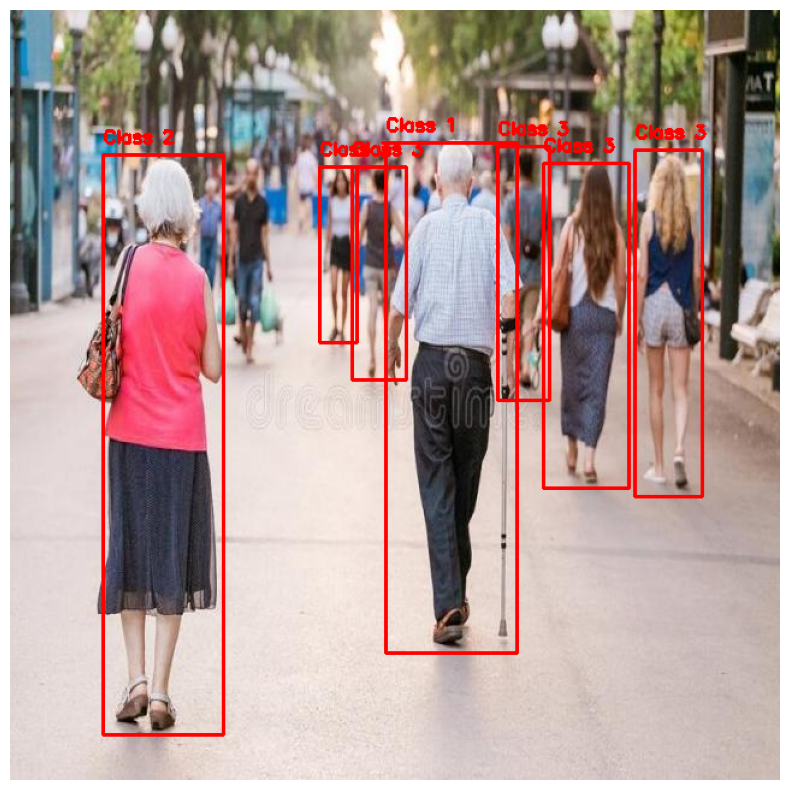

In [4]:
import cv2
import matplotlib.pyplot as plt
import random
import os

def load_random_sample(folder_path):
    # Randomly select an image
    image_folder = os.path.join('/content/dataset/pedestrian-object-detection-dataset/test', "images")
    label_folder = os.path.join('/content/dataset/pedestrian-object-detection-dataset/test', "labels")

    image_file = random.choice(os.listdir(image_folder))
    label_file = os.path.splitext(image_file)[0] + '.txt'

    # Load image
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Load label
    label_path = os.path.join(label_folder, label_file)
    h, w, _ = image.shape
    with open(label_path, 'r') as file:
        for line in file:
            class_id, x_center, y_center, box_width, box_height = map(float, line.split())

            # Convert YOLO format to pixel coordinates
            x_min = int((x_center - box_width / 2) * w)
            y_min = int((y_center - box_height / 2) * h)
            x_max = int((x_center + box_width / 2) * w)
            y_max = int((y_center + box_height / 2) * h)

            # Draw bounding box
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
            cv2.putText(image, f"Class {int(class_id)}", (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Example usage
load_random_sample('/content/dataset/train')


In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 23.3 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
print("Ultralytics YOLOv8 installed successfully!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics YOLOv8 installed successfully!


In [6]:
# Load YOLOv8 model
model = YOLO('yolov8n.yaml')  # Use 'n' for Nano version; options: yolov8n, yolov8s, yolov8m, etc.

# Train the model
model.train(
    data='/content/dataset/pedestrian_classes.yaml',
    epochs=50,  # Number of epochs
    batch=16,   # Batch size
    imgsz=640,   # Image size
    optimizer='AdamW'  # Set the optimizer to AdamW
)


Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/dataset/pedestrian_classes.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

100%|██████████| 755k/755k [00:00<00:00, 21.6MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 103MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/pedestrian-object-detection-dataset/train/labels... 4203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4203/4203 [00:02<00:00, 1850.70it/s]


train: New cache created: /content/dataset/pedestrian-object-detection-dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/pedestrian-object-detection-dataset/valid/labels... 394 images, 0 backgrounds, 0 corrupt: 100%|██████████| 394/394 [00:00<00:00, 547.36it/s]


val: New cache created: /content/dataset/pedestrian-object-detection-dataset/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.22G      2.612      3.329       2.84         58        640: 100%|██████████| 263/263 [01:28<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.23it/s]

                   all        394       1278     0.0466     0.0838     0.0238    0.00761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.21G      2.081      2.872      2.326         50        640: 100%|██████████| 263/263 [01:25<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]


                   all        394       1278     0.0946      0.188     0.0484     0.0179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.21G      1.939      2.714      2.194         51        640: 100%|██████████| 263/263 [01:23<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.76it/s]


                   all        394       1278       0.16      0.304      0.131     0.0524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.19G      1.857      2.632        2.1         61        640: 100%|██████████| 263/263 [01:23<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]


                   all        394       1278      0.205      0.257      0.142     0.0589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.18G      1.811      2.549      2.057         56        640: 100%|██████████| 263/263 [01:21<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.12it/s]

                   all        394       1278      0.182      0.396      0.166     0.0691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.21G      1.743      2.433      1.992         80        640: 100%|██████████| 263/263 [01:20<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.79it/s]


                   all        394       1278      0.247      0.447      0.229      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.18G      1.709      2.355      1.944         85        640: 100%|██████████| 263/263 [01:22<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.85it/s]

                   all        394       1278      0.304      0.415      0.306      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.18G      1.677      2.306      1.913         53        640: 100%|██████████| 263/263 [01:24<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.66it/s]

                   all        394       1278      0.303       0.42      0.315      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.18G      1.655      2.272      1.883         65        640: 100%|██████████| 263/263 [01:20<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]


                   all        394       1278      0.276      0.407      0.284       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.21G      1.613       2.21      1.857         44        640: 100%|██████████| 263/263 [01:20<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.62it/s]


                   all        394       1278      0.329      0.444      0.338      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.18G      1.605      2.163      1.846         56        640: 100%|██████████| 263/263 [01:22<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.86it/s]

                   all        394       1278      0.366      0.486       0.39      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.16G      1.596       2.13      1.827         59        640: 100%|██████████| 263/263 [01:24<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]

                   all        394       1278       0.33      0.529      0.403      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.18G       1.57       2.08      1.804         58        640: 100%|██████████| 263/263 [01:24<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.32it/s]

                   all        394       1278       0.36      0.487      0.388      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.21G      1.528      2.034      1.765         50        640: 100%|██████████| 263/263 [01:21<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.39it/s]

                   all        394       1278      0.352      0.537      0.409      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.18G       1.53      1.988      1.766         57        640: 100%|██████████| 263/263 [01:22<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.25it/s]


                   all        394       1278       0.37      0.514      0.405      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.18G      1.515      1.983      1.748         60        640: 100%|██████████| 263/263 [01:23<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]

                   all        394       1278      0.397      0.545      0.451       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.19G      1.517      1.961      1.749         61        640: 100%|██████████| 263/263 [01:23<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.83it/s]

                   all        394       1278      0.363      0.571      0.447      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.21G      1.484      1.906      1.715         57        640: 100%|██████████| 263/263 [01:22<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.32it/s]


                   all        394       1278      0.396      0.586      0.469      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.18G      1.472      1.878      1.716         54        640: 100%|██████████| 263/263 [01:20<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.87it/s]


                   all        394       1278      0.413       0.58      0.491      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.18G      1.471      1.875      1.711         49        640: 100%|██████████| 263/263 [01:23<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.82it/s]

                   all        394       1278      0.474       0.54      0.493       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.19G      1.458      1.839      1.695         32        640: 100%|██████████| 263/263 [01:24<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.87it/s]


                   all        394       1278       0.45      0.532       0.49      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.17G      1.427      1.803      1.678         53        640: 100%|██████████| 263/263 [01:25<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.78it/s]

                   all        394       1278      0.459      0.571      0.508       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.18G      1.433      1.797       1.68         41        640: 100%|██████████| 263/263 [01:21<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.27it/s]

                   all        394       1278      0.515      0.583      0.537      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.19G      1.421       1.76      1.667         50        640: 100%|██████████| 263/263 [01:21<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.56it/s]

                   all        394       1278      0.472      0.598      0.517      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.18G      1.412      1.746      1.653         73        640: 100%|██████████| 263/263 [01:20<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.86it/s]


                   all        394       1278      0.508      0.598      0.543      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.18G      1.406      1.734      1.656         38        640: 100%|██████████| 263/263 [01:24<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.99it/s]


                   all        394       1278      0.474      0.579      0.518      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.16G      1.393       1.71       1.65         62        640: 100%|██████████| 263/263 [01:24<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.84it/s]

                   all        394       1278      0.461       0.63      0.562      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.26G      1.398      1.688      1.643         43        640: 100%|██████████| 263/263 [01:21<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.46it/s]

                   all        394       1278      0.498      0.593      0.553       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.18G       1.37      1.664      1.627         65        640: 100%|██████████| 263/263 [01:21<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.48it/s]


                   all        394       1278      0.489      0.598      0.574      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.17G      1.365      1.655      1.612         58        640: 100%|██████████| 263/263 [01:20<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]

                   all        394       1278      0.487      0.614      0.553      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.19G      1.351      1.641      1.604         62        640: 100%|██████████| 263/263 [01:24<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.03it/s]

                   all        394       1278      0.509      0.618       0.59      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.19G       1.35      1.615      1.597         38        640: 100%|██████████| 263/263 [01:22<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.52it/s]

                   all        394       1278      0.526      0.633      0.562      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.18G      1.327      1.591      1.584         60        640: 100%|██████████| 263/263 [01:22<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.78it/s]


                   all        394       1278      0.537      0.635       0.61      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.21G      1.328      1.574      1.586         92        640: 100%|██████████| 263/263 [01:22<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.79it/s]

                   all        394       1278      0.519      0.647      0.593      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.18G      1.311      1.561      1.578         43        640: 100%|██████████| 263/263 [01:23<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.97it/s]

                   all        394       1278      0.588      0.628      0.591      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.19G       1.32      1.564      1.575         40        640: 100%|██████████| 263/263 [01:22<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.30it/s]

                   all        394       1278       0.56      0.625      0.603      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.28G        1.3      1.524       1.56         68        640: 100%|██████████| 263/263 [01:20<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.76it/s]

                   all        394       1278      0.566      0.666      0.614      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.17G      1.305      1.525      1.566         46        640: 100%|██████████| 263/263 [01:23<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.91it/s]

                   all        394       1278      0.494      0.636      0.599       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.18G      1.298      1.515      1.558         54        640: 100%|██████████| 263/263 [01:25<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.80it/s]

                   all        394       1278      0.575      0.644      0.626      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.16G      1.281      1.488      1.555         86        640: 100%|██████████| 263/263 [01:26<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.88it/s]

                   all        394       1278      0.582      0.634      0.627       0.39


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.21G      1.219      1.245      1.515         27        640: 100%|██████████| 263/263 [01:20<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.62it/s]

                   all        394       1278      0.541      0.646      0.613      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.17G      1.189      1.188      1.496         36        640: 100%|██████████| 263/263 [01:20<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]

                   all        394       1278      0.592      0.626      0.634      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.16G      1.177      1.157      1.483         26        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.63it/s]

                   all        394       1278      0.583       0.65      0.632      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.18G      1.162      1.137      1.472         21        640: 100%|██████████| 263/263 [01:20<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.81it/s]

                   all        394       1278      0.593      0.655      0.647      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.16G      1.151       1.12      1.463         29        640: 100%|██████████| 263/263 [01:18<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.70it/s]


                   all        394       1278      0.623      0.651      0.648      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.18G      1.146        1.1       1.46         33        640: 100%|██████████| 263/263 [01:20<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.09it/s]

                   all        394       1278      0.625       0.63      0.655      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.14G      1.135      1.087      1.451         29        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.86it/s]

                   all        394       1278      0.612      0.671      0.658      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.16G      1.116      1.067      1.432         33        640: 100%|██████████| 263/263 [01:20<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.64it/s]

                   all        394       1278      0.631      0.655      0.659      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.15G       1.11      1.057      1.435         25        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.27it/s]


                   all        394       1278      0.627      0.644      0.651      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.18G      1.097      1.041      1.426         28        640: 100%|██████████| 263/263 [01:22<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.71it/s]

                   all        394       1278      0.618      0.647      0.648      0.408



50 epochs completed in 1.216 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.41it/s]


                   all        394       1278      0.632      0.653      0.659      0.414
        non_vulnerable        127        333      0.755      0.721       0.77      0.461
children_wo_disability        148        169       0.66      0.811      0.837      0.569
       with_disability        102        163      0.482      0.564      0.467      0.319
 elderly_wo_disability        204        613      0.632      0.517      0.562      0.306
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c3d390be140>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to results.csv
results_path = "/content/runs/detect/train2/results.csv"

# Load the CSV file
df = pd.read_csv(results_path)

# Display the first few rows to understand the data
# print(df.head())
print(df.columns)

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


In [28]:
# Test the model
results = model.val(data='/content/dataset/pedestrian_classes.yaml')
# print(results)
print(results.results_dict)

WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/dataset/pedestrian-object-detection-dataset/valid/labels.cache... 394 images, 0 backgrounds, 0 corrupt: 100%|██████████| 394/394 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:09<00:00,  2.68it/s]


                   all        394       1278      0.631      0.656       0.66      0.414
        non_vulnerable        127        333      0.755      0.721       0.77      0.462
children_wo_disability        148        169      0.664      0.817      0.843      0.569
       with_disability        102        163       0.48      0.571      0.467      0.319
 elderly_wo_disability        204        613      0.624      0.515      0.561      0.306
Speed: 0.5ms preprocess, 4.8ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/train210
{'metrics/precision(B)': 0.630850909463613, 'metrics/recall(B)': 0.6558346170788018, 'metrics/mAP50(B)': 0.6600528035177539, 'metrics/mAP50-95(B)': 0.41398668510500053, 'fitness': 0.43859329694627586}


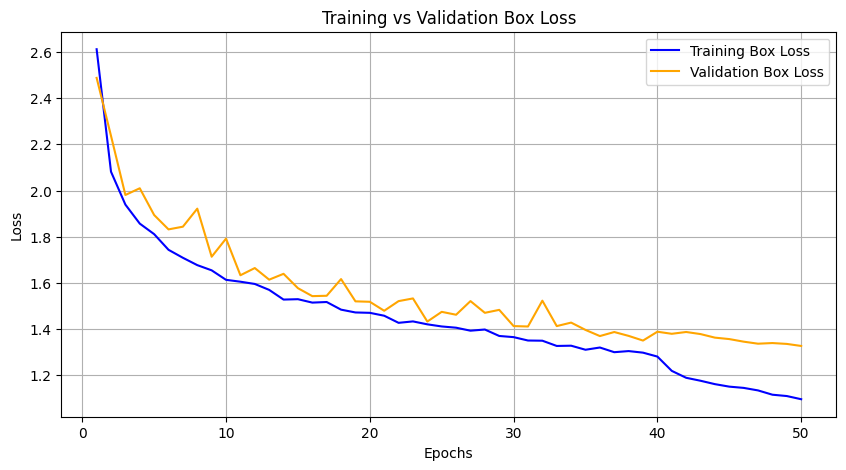

In [14]:
# Path to the results.csv file
results_path = '/content/runs/detect/train2/results.csv'

# Load metrics from the results.csv
df = pd.read_csv(results_path)

# Plot Training vs Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['train/box_loss'], label='Training Box Loss', color='blue')
plt.plot(df['epoch'], df['val/box_loss'], label='Validation Box Loss', color='orange')
plt.title("Training vs Validation Box Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


In [29]:
# Extract and convert metrics to percentages
precision = results.results_dict['metrics/precision(B)'] * 100
recall = results.results_dict['metrics/recall(B)'] * 100
map50 = results.results_dict['metrics/mAP50(B)'] * 100
map50_95 = results.results_dict['metrics/mAP50-95(B)'] * 100

# Print the metrics
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"mAP@50: {map50:.2f}%")
print(f"mAP@50-95: {map50_95:.2f}%")


Precision: 63.09%
Recall: 65.58%
mAP@50: 66.01%
mAP@50-95: 41.40%


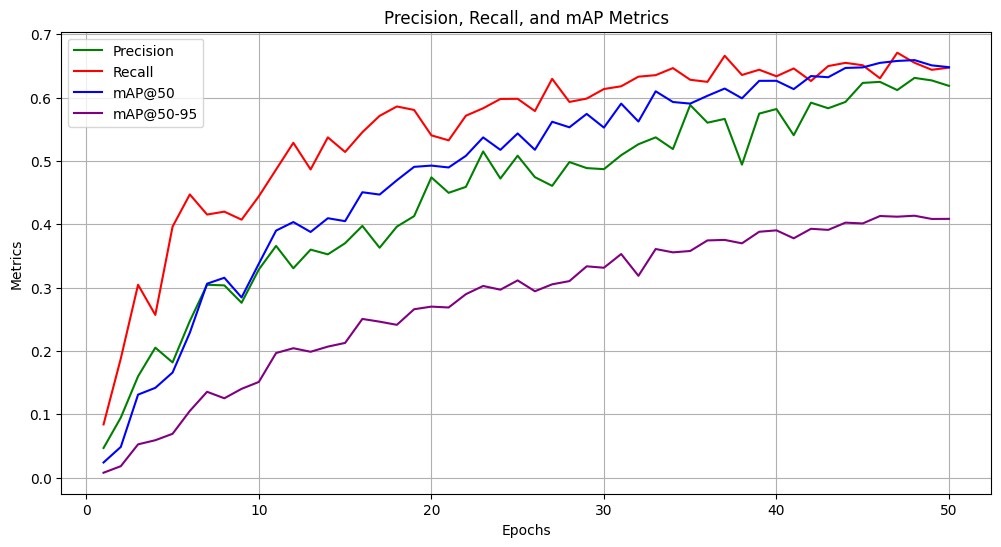

In [17]:
# Plot Precision, Recall, and mAP
plt.figure(figsize=(12, 6))

# Precision
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision', color='green')

# Recall
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall', color='red')

# mAP at IoU 0.5
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@50', color='blue')

# mAP averaged over IoU thresholds
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@50-95', color='purple')

plt.title("Precision, Recall, and mAP Metrics")
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.legend()
plt.grid()
plt.show()


In [18]:
plt.savefig("/content/precision_recall_map_graph.png", dpi=300)


<Figure size 640x480 with 0 Axes>